<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/lesson_3_planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


**Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Multi-Label prediction with Planet Amazon dataset**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import*

**Getting data from Kaggle**


In [33]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

**Download kaggle dataset with cookie.txt from[https://forums.fast.ai/t/lesson-3-cant-download-planet-data-images-tar-archive/60309/9]

**DOWNLOAD FROM COOKIE**[from forum(works)](https://forums.fast.ai/t/lesson-3-cant-download-planet-data-images-tar-archive/60309/9)

In [6]:
!wget --load-cookies /content/cookies.txt https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download-directory/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar

--2020-01-26 00:18:32--  https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download-directory/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580257112&Signature=S3t7Jy6sIGgrMxb9O%2Bl0k697hkwILVru%2B8LSnLk6LqWo8iMYNaoONaor2xQjiuC9GmDy%2FhpUyPNBqu0PmEbAio0UDDNDr%2BmPVpViR5BbeNlSdf8P0UFbrTTepNnsfZD4joSlK9OZA4nL5pPoD3%2FjeJbWZDHTuzT7u%2F0m0cu6%2FX3lFDtuWyU4bbEPouI2ne7zV2QPVWF0OsNrtXSec7BYfWg3i6KALNsPMbq9QmhL9tETTfiYnOGwBU0yHtwkrJxVK1VhlxpqALVg%2F2ZaJBZ9ANxg1SGe61KjWFzu0JgJTMI31Q1mW%2B3LhWnOEftVEdWUpwvZY%2FZQfjZfOdgwLTLGmg%3D%3D&response-content-disposition=attachment%3B+

In [0]:
mv fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar train-jpg.tar.7z

In [9]:
#!sudo apt-get install p7zip
!sudo apt install p7zip-full


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
! 7za -bd -y -so x train-jpg.tar.7z | tar xf - -C data

MANUALLY UPLOAD CSV file

In [31]:
cd data

[Errno 2] No such file or directory: 'data'
/root/.fastai/data/train-jpg


In [36]:
cd data

[Errno 2] No such file or directory: 'data'
/root/.fastai/data


In [37]:
from google.colab import files
files.upload()

Saving train_v2.csv.zip to train_v2.csv.zip


{'train_v2.csv.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00\x85\x9e\xa8J\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x10\x00train_v2.csvUX\x0c\x00\xb80\x11Y\xda.\x11Y\x8a\xfb\x88\x13\xac}\xdd\xd2\xed\xb6\x8d\xe5\xfd<E\x1e\xc0\x17\xe2?\xf84)w\xc7\x95vU\xda\x9er\xd2\x9d\x9ay\xfa\xc1\xe7\xce\x11\x0fA,\x00\xdc\x9e\xcb-\x82\x926DQ\\\\\xc0\xc2\xcf\xff\xf9\xe3_\x7f\xfa\xf3/?\xfe\xe7O?\xfc\xe3\xc7\xbf\xfe\xfd\x7f\xfd\xe3\xb7\x1f\x7f\xfe\xe5\xcf\xcf\x0f\xff\xf1\xe3\xff\xfd\xe9O\xff\xfb\xb7\x9f\xff\xf3\xc7\xdf\xfe\xcf\xbf\x0e\xa6\x1f~\xfc\xebo?\xff\xfb\x7f\xfd\xed\x1f\xff\xf5\xdbO\x7f\xfa\xf7\xbf\xfd\xf4\xe3o\xdf,\xfe\xf4\xcf\x1f\xff\xf1\xd3o\xff\xb2\xcb?lm\xff:Z\xd4\xa3U9\xe7\x7f\xfc\xf8o?\xff\xe3\xc7\x7f\xfc\xfc\xeb/\xef\xe9\x7f\xfb\xf5\xc7\xbf\xfc\xabG\xdbnm\xbbpWN\xf6\xf5\xeb\xe7\xff\xde\xcf\xf6}\x9f\xa1\xfdS\x8a\x9d\xe8_\xd63x\xd9\xef\xfeDz\x0c_\xfe\xfdo?\xfe\xfd?\xfe\xfco\xff\xf5\xdb/\xdb\x9d\xa6\xf4\x03\xf6y\xfar\xfa\xaf\xff\xf5\x97\xf7Y\xe9\xeeNU\x985\xdd\xac\xeb\x87\xc7\x0f\xf

In [39]:
!unzip train_v2.csv.zip

Archive:  train_v2.csv.zip
  inflating: train_v2.csv            
   creating: __MACOSX/
  inflating: __MACOSX/._train_v2.csv  


In [40]:
ls

__MACOSX/  train-jpg/  train_v2.csv  train_v2.csv.zip


**MULTICLASSIFICATION**

In [45]:
df = pd.read_csv('train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1,max_zoom=1.05,max_warp=0.)

before this cd into root/fastai

In [0]:
np.random.seed(42)
src = (ImageList.from_csv('data','train_v2.csv',folder='train-jpg', suffix= '.jpg')
        .split_by_rand_pct(0.2)
        .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
          .databunch().normalize(imagenet_stats))

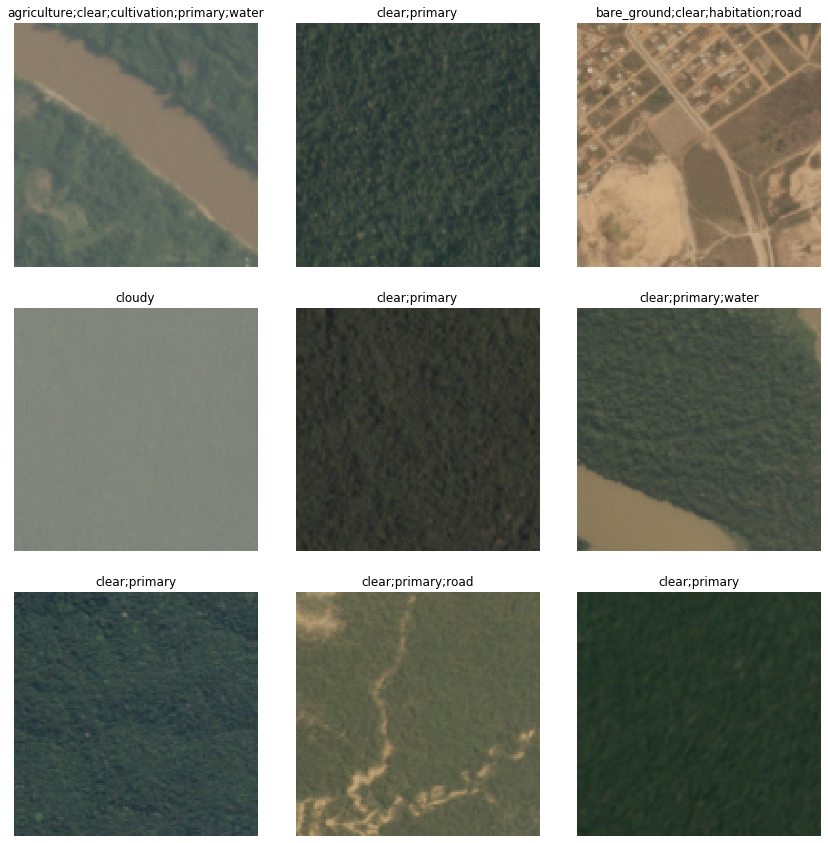

In [55]:
data.show_batch(rows=3)

**Lets build a model**

In [0]:
arch = models.resnet50

In [59]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score =partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 28.2MB/s]


In [60]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


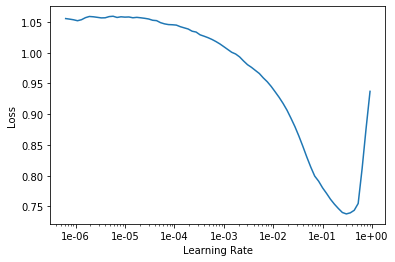

In [61]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [63]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.138633,0.116131,0.944120,0.897884,02:25
1,0.112752,0.098867,0.953203,0.914450,02:25
2,0.100891,0.092294,0.954801,0.920446,02:25
3,0.096100,0.088177,0.956240,0.924946,02:25
4,0.092745,0.087342,0.955136,0.924145,02:25


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


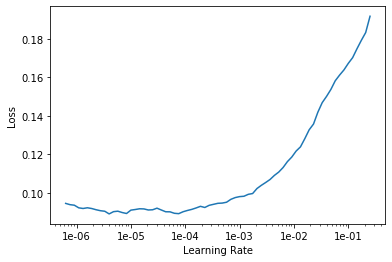

In [66]:
learn.lr_find()
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(5,slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096825,0.092614,0.950391,0.919965,02:35
1,0.096952,0.090357,0.956633,0.923925,02:37
2,0.092634,0.087836,0.956603,0.923454,02:36
3,0.084436,0.082740,0.959183,0.928498,02:35
4,0.081466,0.082588,0.959597,0.928936,02:36


In [0]:
learn.save('stage-2-rn50')

**Transfer learning here is training on smaller size images(128) and then transfering learning to large images(256) improves the accuracy(using the overfitting on smaller image size)**

In [69]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


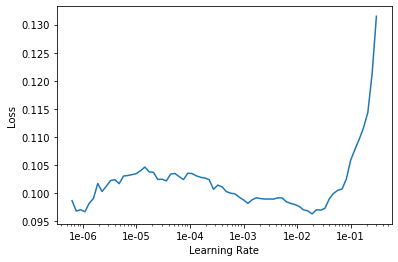

In [71]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr=1e-2/2

In [73]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.086873,0.085573,0.959067,0.926000,05:17
1,0.088650,0.083503,0.956822,0.928904,05:17
2,0.082079,0.083683,0.959198,0.926259,05:16
3,0.081928,0.081989,0.959205,0.928753,05:16
4,0.081081,0.081358,0.960477,0.930485,05:16


In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5,slice(1e-5, lr/5))

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-256-rn50')

In [0]:
learn.export()